<a href="https://colab.research.google.com/github/MariaDanielaVelasco/LE1_Velasco_MD/blob/main/LE1_Velasco__MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### **Loading Dataset**

In [ ]:
arfl = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/airfoil_self_noise.csv'))
#Checking the head of dataset
arfl.head()

,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### **Data Analysis**

In [ ]:
#Checking the information
arfl.info()
arfl.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   attack_angle                         1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure                1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


### **Checking for Null/Missing Values and Duplication**

In [ ]:
print("Null/Missing Values:")
arfl.isnull().sum()

Null/Missing Values:


frequency                              0
attack_angle                           0
chord_length                           0
free_stream_velocity                   0
suction_side_displacement_thickness    0
scaled_sound_pressure                  0
dtype: int64

In [ ]:
print("Duplicate Values:")
arfl.duplicated().sum()

Duplicate Values:


0

In [ ]:
#Checking the shape of df
arfl.shape

(1503, 6)

### **Visualizing the Variables**

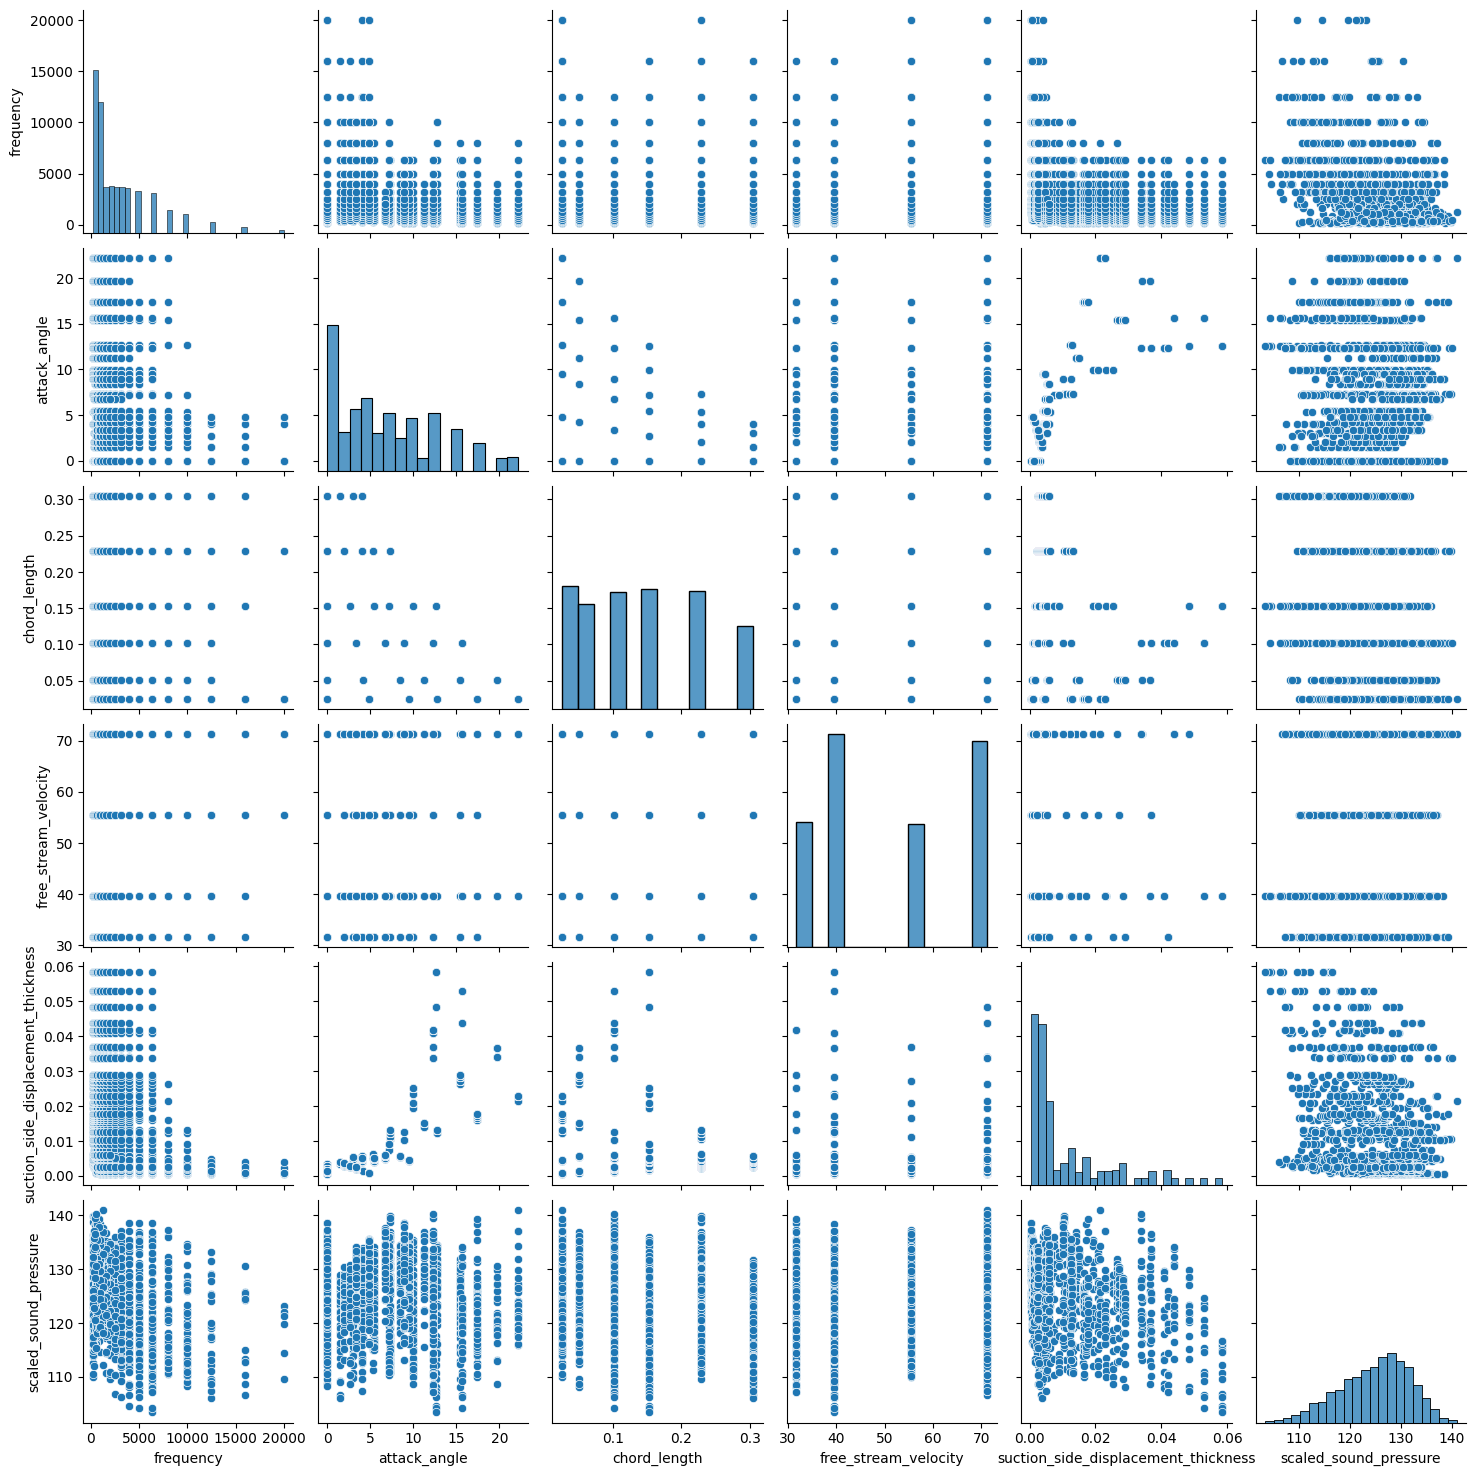

In [ ]:
sns.pairplot(arfl)

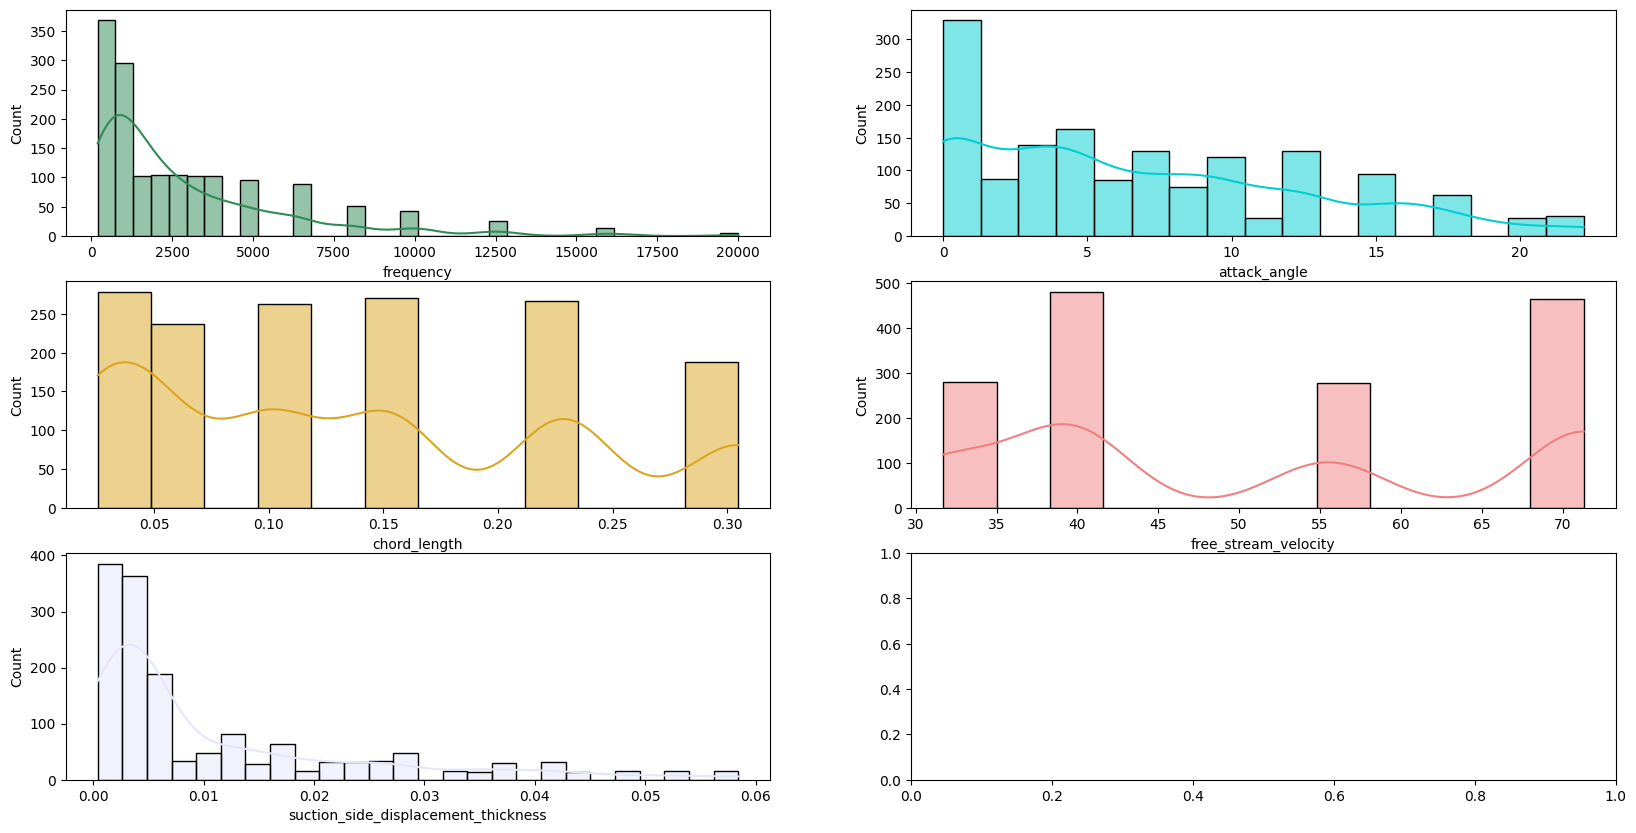

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

sns.histplot(data=arfl, x="frequency", kde=True, color="seagreen", ax=axs[0, 0])
sns.histplot(data=arfl, x="attack_angle", kde=True, color="darkturquoise", ax=axs[0, 1])
sns.histplot(data=arfl, x="chord_length", kde=True, color="goldenrod", ax=axs[1, 0])
sns.histplot(data=arfl, x="free_stream_velocity", kde=True, color="lightcoral", ax=axs[1, 1])
sns.histplot(data=arfl, x="suction_side_displacement_thickness", kde=True, color="lavender", ax=axs[2, 0])
plt.show()

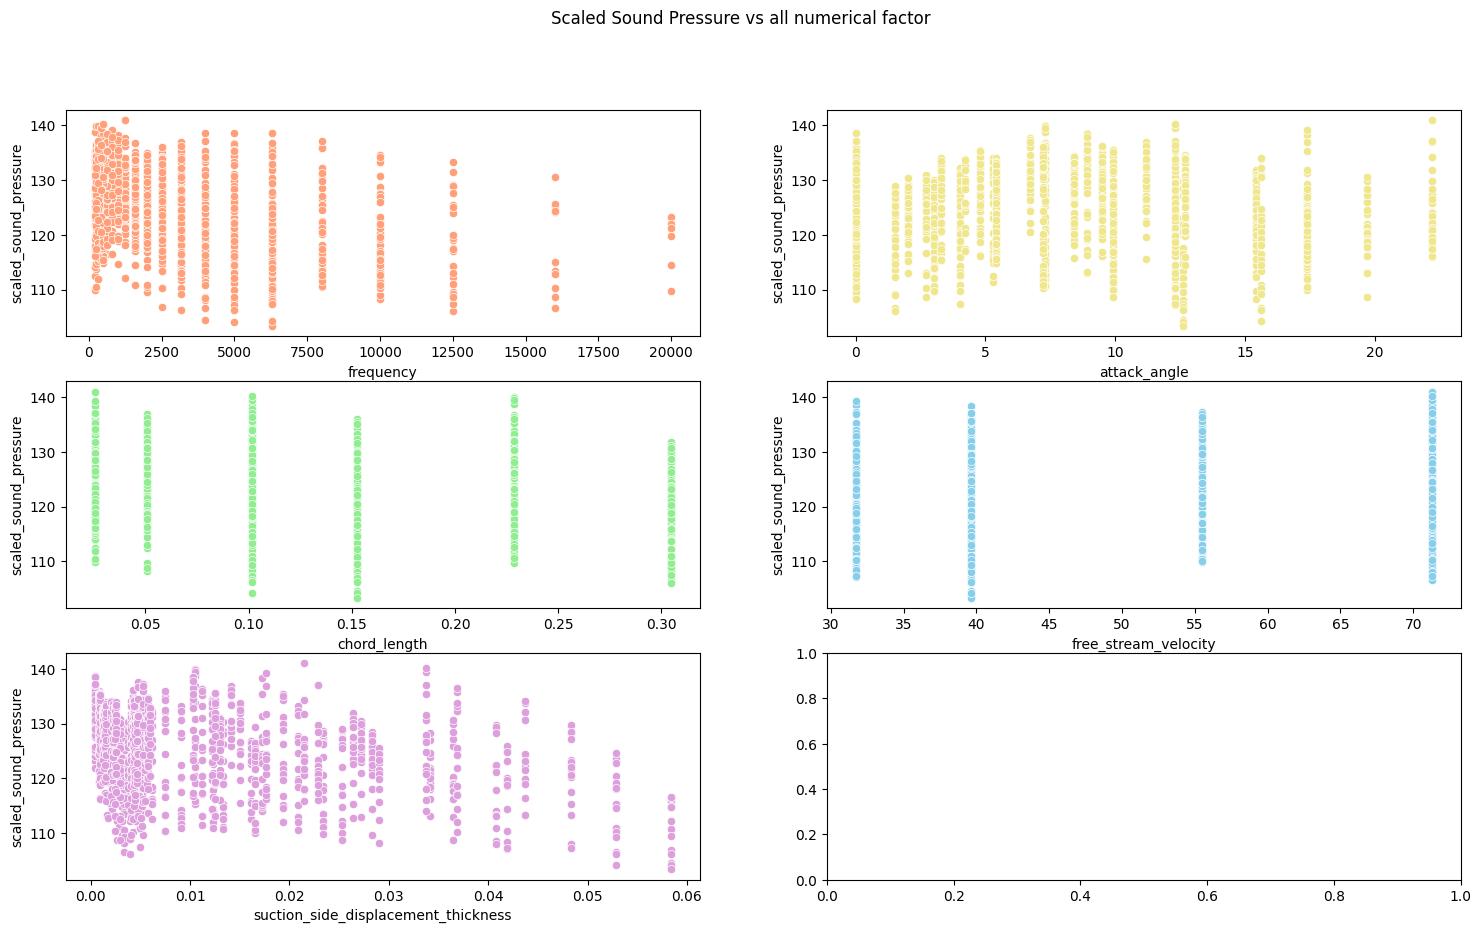

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Scaled Sound Pressure vs all numerical factor')
sns.scatterplot(data=arfl, x='frequency', y='scaled_sound_pressure', ax=axs[0, 0], color="lightsalmon")
sns.scatterplot(data=arfl, x='attack_angle', y='scaled_sound_pressure', ax=axs[0, 1], color="khaki")
sns.scatterplot(data=arfl, x='chord_length', y='scaled_sound_pressure', ax=axs[1, 0], color="lightgreen")
sns.scatterplot(data=arfl, x='free_stream_velocity', y='scaled_sound_pressure', ax=axs[1, 1], color="skyblue")
sns.scatterplot(data=arfl, x='suction_side_displacement_thickness', y='scaled_sound_pressure', ax=axs[2, 0], color="plum")
plt.show()

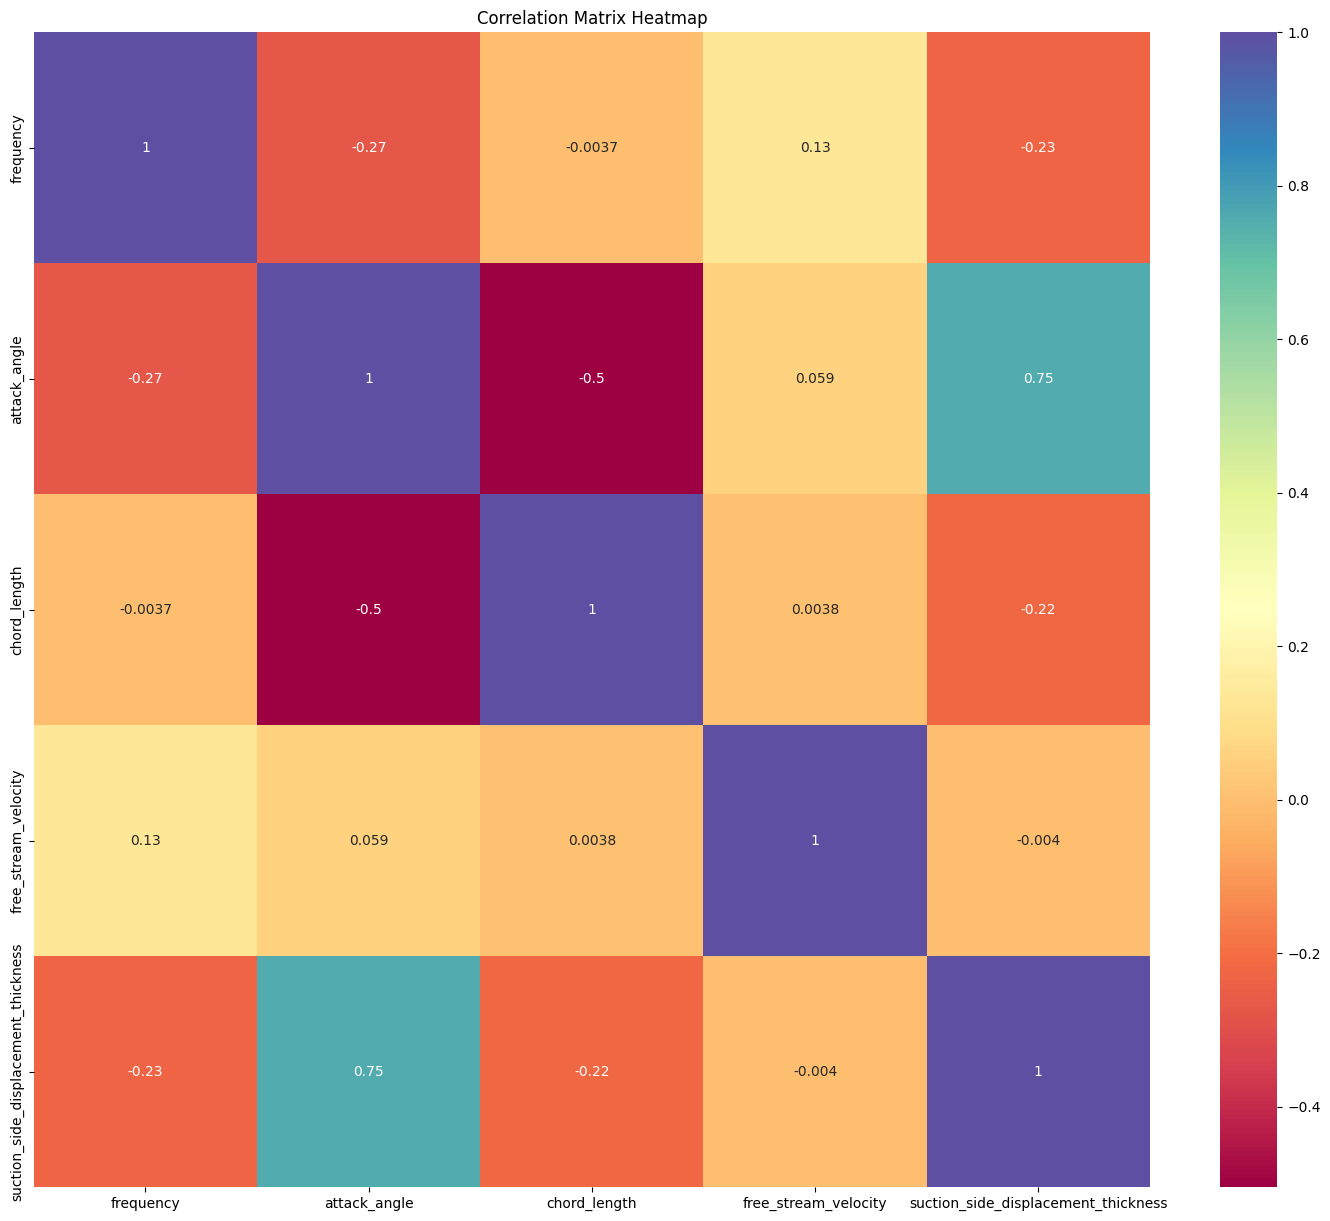

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(X.corr(), annot = True, cmap="Spectral")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X = arfl.drop('scaled_sound_pressure', axis = 1)
y = arfl['scaled_sound_pressure']

X.columns

Index(['frequency', 'attack_angle', 'chord_length', 'free_stream_velocity',
       'suction_side_displacement_thickness'],
      dtype='object')

### **Linear Regression**

In [ ]:
#Splitting Dataset
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [ ]:
#Loading pipeline
lr_pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
    )

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#Prediction
y_pred = lr_pipe.predict(X_test)

In [ ]:
#Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error", rmse)

R2 Score: 0.5582979754897286
Mean Squared Error: 22.128643318247274
Mean Absolute Error: 3.6724145641788004
Root Mean Squared Error 4.704109194974887


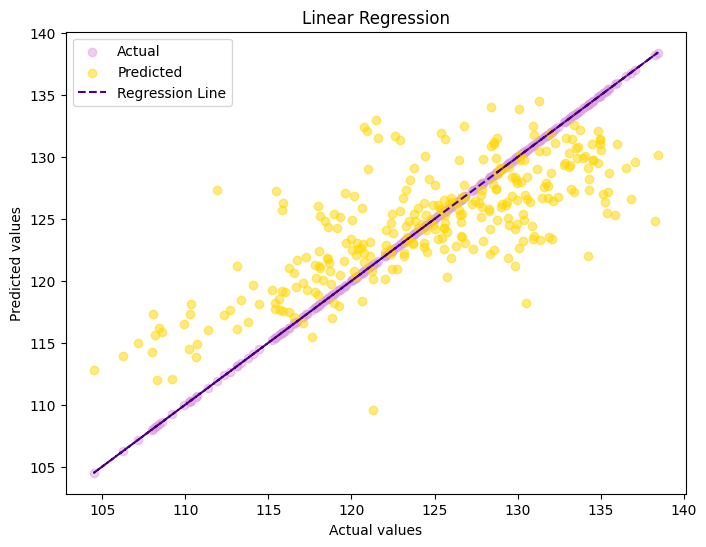

In [ ]:
#Plotting the model
plt.scatter(y_test, y_test, color='plum', alpha=0.5, label='Actual')
plt.scatter(y_test, y_pred, color='gold', alpha=0.5, label='Predicted')
plt.plot(y_test, y_test, color='indigo', linestyle='--', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

In [ ]:
import joblib
joblib.dump(lr_pipe,'/content/drive/MyDrive/Colab Notebooks/lin_regression.pckl')

load = joblib.load('/content/drive/MyDrive/Colab Notebooks/lin_regression.pckl')


### **Ridge**

In [ ]:
#Splitting Dataset
np.random.seed(0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [ ]:
#Loading pipeline
trans_regr = TransformedTargetRegressor(
        regressor=Ridge(alpha=1.0), func=np.log10, inverse_func=sp.special.exp10 )

rdg_pipe = make_pipeline(
    StandardScaler(),
    trans_regr
)

rdg_pipe.fit(X_train_2, y_train_2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge()))])

In [ ]:
#Prediction
y_pred_2 = rdg_pipe.predict(X_test_2)

In [ ]:
#Metrics
r2_2 = r2_score(y_test_2, y_pred_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print("R2 Score:", r2_2)
print("Mean Squared Error:", mse_2)
print("Mean Absolute Error:", mae_2)
print("Root Mean Squared Error", rmse_2)

R2 Score: 0.5536541379341591
Mean Squared Error: 22.361292976145066
Mean Absolute Error: 3.6827131838816065
Root Mean Squared Error 4.72877288269854


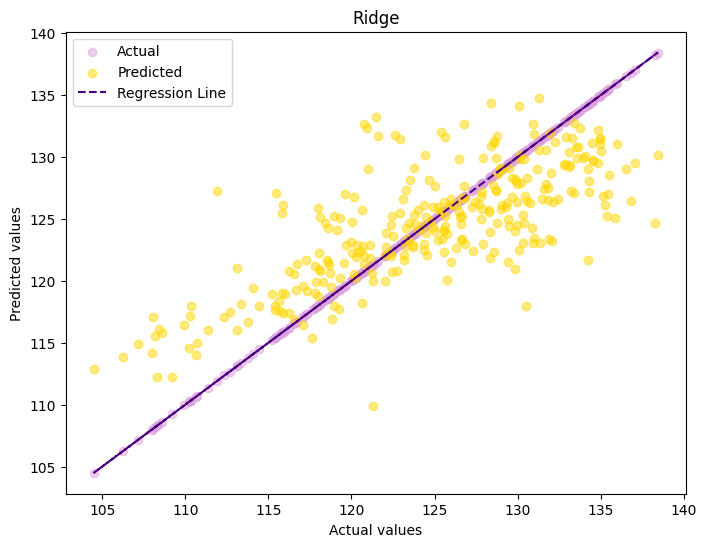

In [ ]:
#Plotting the model
plt.scatter(y_test_2, y_test_2, color='plum', alpha=0.5, label='Actual')
plt.scatter(y_test_2, y_pred_2, color='gold', alpha=0.5, label='Predicted')
plt.plot(y_test_2, y_test_2, color='indigo', linestyle='--', label='Regression Line')
plt.title('Ridge')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

In [ ]:
import joblib
joblib.dump(rdg_pipe,'/content/drive/MyDrive/Colab Notebooks/rdg.pckl')

load = joblib.load('/content/drive/MyDrive/Colab Notebooks/rdg.pckl')


### **RidgeCV**

In [ ]:
#Splitting Dataset
np.random.seed(0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train_3.shape)
print(X_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [ ]:
#Loading pipeline
trans_regr = TransformedTargetRegressor(
        regressor=RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]), func=np.log10, inverse_func=sp.special.exp10 )

rdgcv_pipe = make_pipeline(
    StandardScaler(),
    trans_regr
)

rdgcv_pipe.fit(X_train_3, y_train_3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=RidgeCV(alphas=[0.001,
                                                                      0.01, 0.1,
                                                                      1])))])

In [ ]:
#Prediction
y_pred_3 = rdgcv_pipe.predict(X_test_3)

In [ ]:
#Metrics
r2_3 = r2_score(y_test_3, y_pred_3)
mae_3 = mean_absolute_error(y_test_3, y_pred_3)
mse_3 = mean_squared_error(y_test_3, y_pred_3)
rmse_3 = np.sqrt(mse_3)

print("R2 Score:", r2_3)
print("Mean Squared Error:", mse_3)
print("Mean Absolute Error:", mae_3)
print("Root Mean Squared Error", rmse_3)

R2 Score: 0.5536541379342743
Mean Squared Error: 22.361292976139293
Mean Absolute Error: 3.682713183882138
Root Mean Squared Error 4.72877288269793


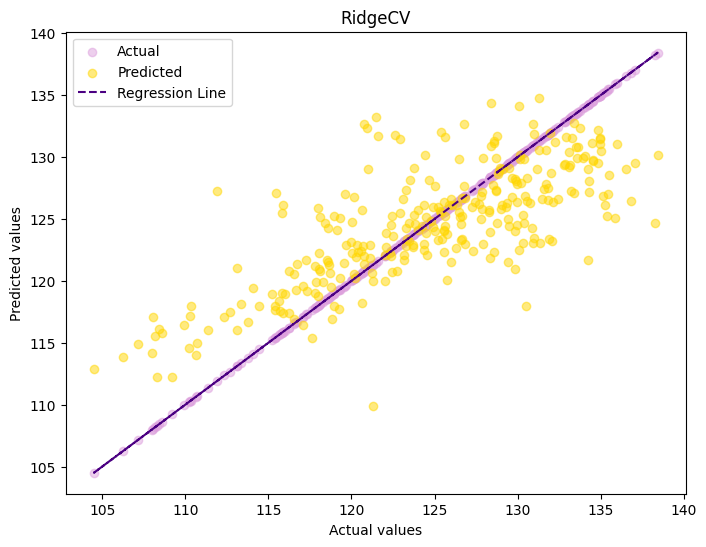

In [ ]:
#Plotting the model
plt.scatter(y_test_3, y_test_3, color='plum', alpha=0.5, label='Actual')
plt.scatter(y_test_3, y_pred_3, color='gold', alpha=0.5, label='Predicted')
plt.plot(y_test_3, y_test_3, color='indigo', linestyle='--', label='Regression Line')
plt.title('RidgeCV')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

In [ ]:
import joblib
joblib.dump(rdgcv_pipe,'/content/drive/MyDrive/Colab Notebooks/rdgcv.pckl')

load = joblib.load('/content/drive/MyDrive/Colab Notebooks/rdgcv.pckl')

### **SGDRegressor**

In [ ]:
#Splitting Dataset
np.random.seed(0)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train_4.shape)
print(X_test_4.shape)
print(y_train_4.shape)
print(y_test_4.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [ ]:
#Loading pipeline
sgdregr_pipe = make_pipeline(
    StandardScaler(),
    SGDRegressor(max_iter=1000, tol=1e-3)
)

sgdregr_pipe.fit(X_train_4, y_train_4)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
#Prediction
y_pred_4 = sgdregr_pipe.predict(X_test_4)

In [ ]:
#Metrics
r2_4 = r2_score(y_test_4, y_pred_4)
mae_4 = mean_absolute_error(y_test_4, y_pred_4)
mse_4 = mean_squared_error(y_test_4, y_pred_4)
rmse_4 = np.sqrt(mse_4)

print("R2 Score:", r2_4)
print("Mean Squared Error:", mse_4)
print("Mean Absolute Error:", mae_4)
print("Root Mean Squared Error", rmse_4)

R2 Score: 0.5567920325297977
Mean Squared Error: 22.20408891905674
Mean Absolute Error: 3.6653258670556825
Root Mean Squared Error 4.712121488147004


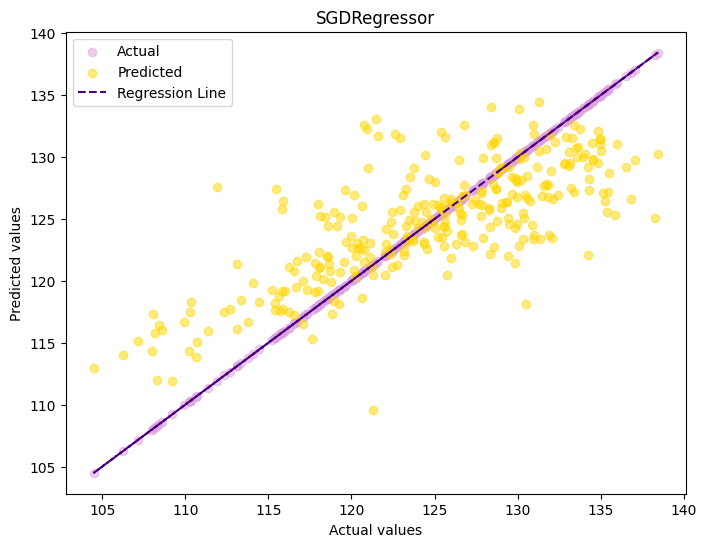

In [ ]:
#Plotting the model
plt.scatter(y_test_4, y_test_4, color='plum', alpha=0.5, label='Actual')
plt.scatter(y_test_4, y_pred_4, color='gold', alpha=0.5, label='Predicted')
plt.plot(y_test_4, y_test_4, color='indigo', linestyle='--', label='Regression Line')
plt.title('SGDRegressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

In [ ]:
import joblib
joblib.dump(sgdregr_pipe,'/content/drive/MyDrive/Colab Notebooks/sgdregr.pckl')

load = joblib.load('/content/drive/MyDrive/Colab Notebooks/sgdregr.pckl')

### **Decision Tree Regressor**

In [ ]:
#Splitting Dataset
np.random.seed(0)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train_5.shape)
print(X_test_5.shape)
print(y_train_5.shape)
print(y_test_5.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [ ]:
#Loading pipeline
dectregr_model = DecisionTreeRegressor()
scaler = StandardScaler()

dectregr_pipe = make_pipeline(
    scaler,
    dectregr_model
)

X_train_scaled = scaler.fit_transform(X_train_5)
X_test_scaled = scaler.transform(X_test_5)

dectregr_pipe.fit(X_train_scaled, y_train_5)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
#Prediction
y_pred_5 = dectregr_pipe.predict(X_test_scaled)

In [ ]:
#Metrics
r2_5 = r2_score(y_test_5, y_pred_5)
mae_5 = mean_absolute_error(y_test_5, y_pred_5)
mse_5 = mean_squared_error(y_test_5, y_pred_5)
rmse_5 = np.sqrt(mse_5)

print("R2 Score:", r2_5)
print("Mean Squared Error:", mse_5)
print("Mean Absolute Error:", mae_5)
print("Root Mean Squared Error", rmse_5)

R2 Score: 0.8970950727624725
Mean Squared Error: 5.155390521594681
Mean Absolute Error: 1.6554186046511623
Root Mean Squared Error 2.2705485067698246


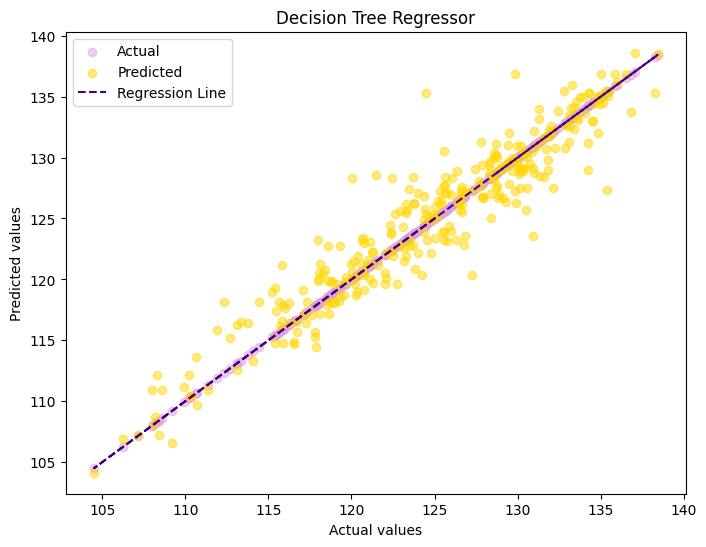

In [ ]:
#Plotting the model
plt.scatter(y_test_5, y_test_5, color='plum', alpha=0.5, label='Actual')
plt.scatter(y_test_5, y_pred_5, color='gold', alpha=0.5, label='Predicted')
plt.plot(y_test_5, y_test_5, color='indigo', linestyle='--', label='Regression Line')
plt.title('Decision Tree Regressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

In [ ]:
import joblib
joblib.dump(dectregr_pipe,'/content/drive/MyDrive/Colab Notebooks/dectregr.pckl')

load = joblib.load('/content/drive/MyDrive/Colab Notebooks/dectregr.pckl')

### **Random Forest Regressor**

In [ ]:
#Splitting Dataset
np.random.seed(0)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train_6.shape)
print(X_test_6.shape)
print(y_train_6.shape)
print(y_test_6.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [ ]:
#Loading pipeline
ranforegr_model = RandomForestRegressor(n_estimators=5,random_state=0)
scaler = StandardScaler()

ranforegr_pipe = make_pipeline(
    scaler,
    dectregr_model
)

X_train_scaled = scaler.fit_transform(X_train_6)
X_test_scaled = scaler.transform(X_test_6)

ranforegr_pipe.fit(X_train_scaled, y_train_6)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
#Prediction
y_pred_6 = ranforegr_pipe.predict(X_test_scaled)

In [ ]:
#Metrics
r2_6 = r2_score(y_test_6, y_pred_6)
mae_6 = mean_absolute_error(y_test_6, y_pred_6)
mse_6 = mean_squared_error(y_test_6, y_pred_6)
rmse_6 = np.sqrt(mse_6)

print("R2 Score:", r2_6)
print("Mean Squared Error:", mse_6)
print("Mean Absolute Error:", mae_6)
print("Root Mean Squared Error", rmse_6)

R2 Score: 0.8849104741620234
Mean Squared Error: 5.765821584717606
Mean Absolute Error: 1.7462890365448502
Root Mean Squared Error 2.4012125238548974


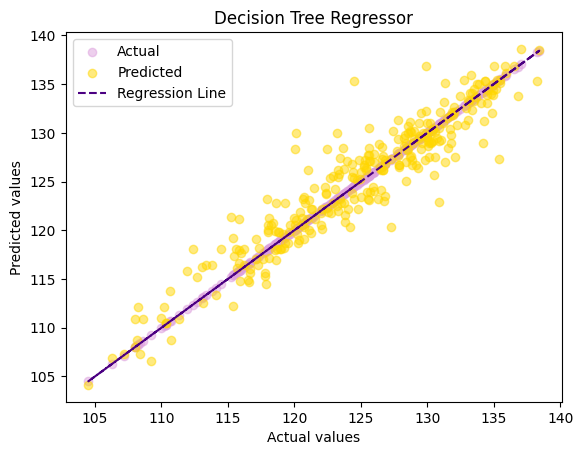

In [ ]:
#Plotting the model
plt.scatter(y_test_6, y_test_6, color='plum', alpha=0.5, label='Actual')
plt.scatter(y_test_6, y_pred_6, color='gold', alpha=0.5, label='Predicted')
plt.plot(y_test_6, y_test_6, color='indigo', linestyle='--', label='Regression Line')
plt.title('Random Forest Regressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

### **Comparison of Models**

In [ ]:
mylist=[]
mylist2=[]
mylist.append(r2)
mylist2.append("LinearRegression")
mylist.append(r2_2)
mylist2.append("Ridge")
mylist.append(r2_3)
mylist2.append("RidgeCV")
mylist.append(r2_4)
mylist2.append("SGDRegressor")
mylist.append(r2_5)
mylist2.append("Decision Tree Regressor")
mylist.append(r2_6)
mylist2.append("RandomForest Regressor")

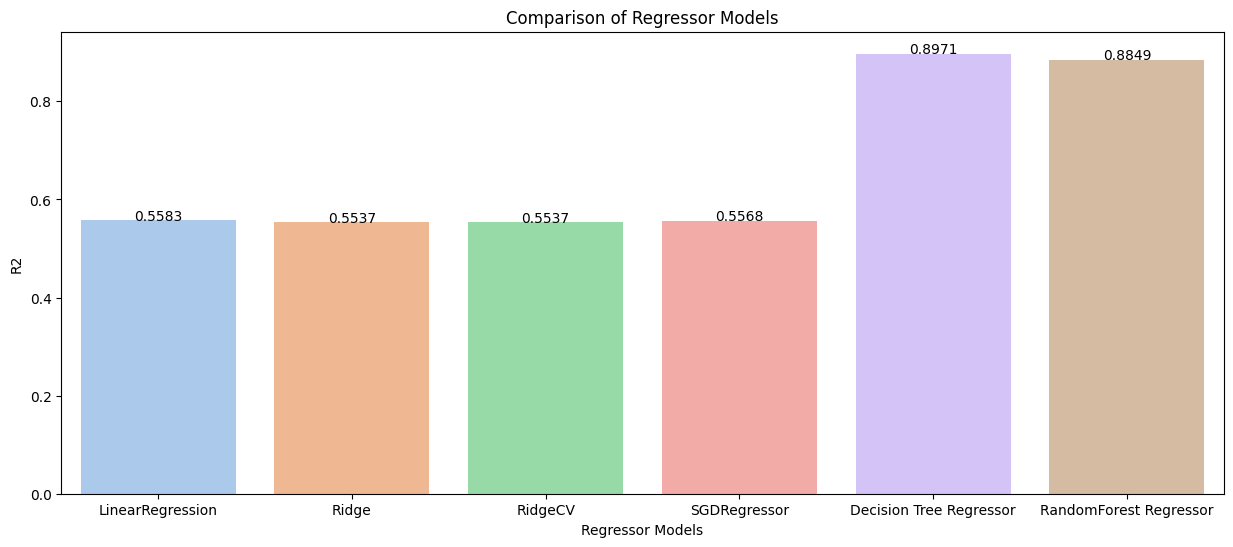

In [ ]:
fig = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=mylist2, y=mylist, palette = "pastel", hue=mylist2, legend=False)
plt.xlabel("Regressor Models")
plt.ylabel("R2")
plt.title("Comparison of Regressor Models")
for i, score in enumerate(mylist):
    ax.text(i, score, f"{round(score, 4)}", ha='center')
plt.show()


In [ ]:
import joblib
joblib.dump(ranforegr_pipe,'/content/drive/MyDrive/Colab Notebooks/ranforegr.pckl')

load = joblib.load('/content/drive/MyDrive/Colab Notebooks/ranforegr.pckl')